Please note, this script was used at various points of development. It was used to test specific functions, code snippets which may no longer be relevant in the final version of the script

## Part One

### Load Pickled Data

In [97]:
from pathlib import Path
import pandas as pd

df = pd.read_pickle(Path.cwd() / "pickles" /"parsed.pickle")

In [98]:
import importlib
import PartOne as po

importlib.reload(po)

row = df.iloc[2]
print(row['title'])
print(po.subjects_by_verb_pmi(row['parsed'], 'hear'))



[nltk_data] Downloading package cmudict to
[nltk_data]     /Users/enmanuelmoreno/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


A_Tale_of_Two_Cities
['Monseigneur', 'she', 'I', 'Jerry', 'you', 'he', 'they', 'we', 'one', 'D’ye']


### Scratched/Tests scripts

In [100]:
## Get column names
df.columns
# initialise dictionary
adj_dict = {}
# Loops thru each row in the df and gets the spacy doc
for index, row in df.iterrows():
    print("-"*30)
    print(row['title'])
    doc = row['parsed']
    # Loop thru each word of each spacy doc
    for token in doc:
        if token.pos_ == "ADJ":
            adj = token.lemma_
            adj_dict[adj] = adj_dict.get(adj, 0) + 1

# Convert dictionary to lsit of tuples
adj_list = list(adj_dict.items())


print(adj_list)

------------------------------
Sense_and_Sensibility
------------------------------
North_and_South
------------------------------
A_Tale_of_Two_Cities
------------------------------
Erewhon
------------------------------
The_American
------------------------------
Dorian_Gray
------------------------------
Tess_of_the_DUrbervilles
------------------------------
The_Golden_Bowl
------------------------------
The_Secret_Garden
------------------------------
Portrait_of_the_Artist
------------------------------
The_Black_Moth
------------------------------
Orlando
------------------------------
Blood_Meridian
[('large', 451), ('many', 1031), ('respectable', 61), ('general', 238), ('good', 2206), ('late', 200), ('single', 148), ('advanced', 26), ('constant', 73), ('own', 1991), ('great', 1937), ('legal', 15), ('old', 1748), ('solid', 25), ('former', 126), ('present', 393), ('steady', 69), ('young', 1203), ('important', 91), ('independent', 44), ('small', 650), ('first', 914), ('other', 20

#### Test subject by verb count

In [101]:
# Test subject_by_verb_count
import importlib
import PartOne as po

importlib.reload(po)


df_mini = df.iloc[[0]]
#print(df_mini)

for i, row in df.iterrows():
    print(row['title'])
    for pair in po.subjects_by_verb_count(row['parsed'], 'run'):
        print(f"\t {pair}")


[nltk_data] Downloading package cmudict to
[nltk_data]     /Users/enmanuelmoreno/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


Sense_and_Sensibility
	 {('run', 'she'): 3}
	 {('run', 'I'): 2}
	 {('run', 'evening!—I'): 1}
	 {('run', 'he'): 1}
North_and_South
	 {('run', 'I'): 6}
	 {('run', 'she'): 3}
	 {('run', 'Margaret'): 2}
	 {('run', 'they'): 2}
	 {('run', 'blood'): 2}
	 {('run', 'you'): 2}
	 {('run', 'thought'): 2}
	 {('run', 'course'): 1}
	 {('run', 'street'): 1}
	 {('run', 'he'): 1}
A_Tale_of_Two_Cities
	 {('run', 'it'): 4}
	 {('run', 'he'): 4}
	 {('run', 'water'): 2}
	 {('run', 'who'): 2}
	 {('run', 'sea'): 1}
	 {('run', 'shiver'): 1}
	 {('run', 'woman'): 1}
	 {('run', 'wine'): 1}
	 {('run', 'kennel'): 1}
	 {('run', 'text'): 1}
Erewhon
	 {('run', 'they'): 3}
	 {('run', 'I'): 2}
	 {('run', 'she'): 2}
	 {('run', 'river'): 1}
	 {('run', 'we'): 1}
	 {('run', 'shudder'): 1}
	 {('run', 'which'): 1}
	 {('run', 'Zulora'): 1}
	 {('run', 'rule'): 1}
	 {('run', 'who'): 1}
The_American
	 {('run', 'she'): 3}
	 {('run', 'it'): 3}
	 {('run', 'you'): 2}
	 {('run', 'which'): 1}
	 {('run', 'answer'): 1}
	 {('run', 'thought

### Developing Pointwise mutual information

Use only 1 row of the data frame for development only

In [102]:
import spacy

df_mini = df.iloc[0]

data = [{'title': "dummy_text", 'text': 'The cat hears a mouse. The dog hears a noise. The cat hears the dog.'}]

df_mini = pd.DataFrame(data)

# load your model

nlp = spacy.load("en_core_web_sm")

# add parse

df_mini['parsed'] = df_mini['text'].apply(nlp)
df_mini = df_mini.iloc[0]

print(df_mini.head())


title                                            dummy_text
text      The cat hears a mouse. The dog hears a noise. ...
parsed    (The, cat, hears, a, mouse, ., The, dog, hears...
Name: 0, dtype: object


#### Create the Subject-Verb pairs

In [103]:
# count of co occurrence
verb = 'hear'
verb_subject = po.subjects_by_verb_count(df_mini['parsed'], verb)

# for doc in df_mini['parsed']:
#     verb_subject = (po.subjects_by_verb_count(doc, "hear"))
print(df_mini['title'])
print(f"1. Counts of Verbs and Subjects:\n\t{verb_subject}\n")

dummy_text
1. Counts of Verbs and Subjects:
	[{('hear', 'cat'): 2}, {('hear', 'dog'): 1}]



#### Extract unique words from the S-V pairs

In [104]:
# Extract unique objects
unique_w = set()
for d in verb_subject:
    for k in d.keys():
        for ind in k:
            unique_w.add(ind)



print(f"2. Extract unique words for total counts: \n\t{unique_w}\n")

2. Extract unique words for total counts: 
	{'cat', 'dog', 'hear'}



#### Count total words, and count of individual words

In [105]:
# Count word occurrence in whole document, and total tokens in doc
total_words = 0
# Create and add keys to count the expected words
total_existing = {w: 0 for w in unique_w}

for token in df_mini['parsed']:

    if token.text.isalpha():
        total_words += 1
        word_lemma = token.lemma_
        if word_lemma in total_existing:
            total_existing[word_lemma] += 1
print(f"3. Total words and total count for existing words: \n\tTotal words: {total_words}\n\tTotal count for existing:\n\t{total_existing}")
       

3. Total words and total count for existing words: 
	Total words: 15
	Total count for existing:
	{'cat': 2, 'dog': 2, 'hear': 3}


#### Calculate PPMI for the pair of the top 10 S-V pairs

In [106]:
import math
# Probability of the verb (context)
p_c = total_existing[verb]/total_words
ppmi_dict = {}
# Loop over the dictionary of the 10 s-v pairs
for d in verb_subject:
    for key, value in d.items():
        # probability of the pair verb-subject
        p_wc = value/total_words
        # Probability of the subject (word)
        p_w = total_existing[key[1]]/total_words
        # Calculate PMI
        pmi = p_wc/(p_w * p_c)
        pmi = math.log2(pmi)
        ppmi = max(pmi,0)
        print(f"Key: {key}, PPMI: {round(ppmi,3)}")
        # Add value to final dict
        ppmi_dict[key] = ppmi_dict.get(key, round(ppmi,3))
# Sort final dictionary
ppmi_dict = sorted(ppmi_dict.items(), key = lambda item: item[1], reverse = True)

print(ppmi_dict)

Key: ('hear', 'cat'), PPMI: 2.322
Key: ('hear', 'dog'), PPMI: 1.322
[(('hear', 'cat'), 2.322), (('hear', 'dog'), 1.322)]


### Counting all syntactic objects

Understanding dep_ tags

In [107]:
import spacy

nlp = spacy.load("en_core_web_sm")

print(nlp.pipe_labels['parser'])


['ROOT', 'acl', 'acomp', 'advcl', 'advmod', 'agent', 'amod', 'appos', 'attr', 'aux', 'auxpass', 'case', 'cc', 'ccomp', 'compound', 'conj', 'csubj', 'csubjpass', 'dative', 'dep', 'det', 'dobj', 'expl', 'intj', 'mark', 'meta', 'neg', 'nmod', 'npadvmod', 'nsubj', 'nsubjpass', 'nummod', 'oprd', 'parataxis', 'pcomp', 'pobj', 'poss', 'preconj', 'predet', 'prep', 'prt', 'punct', 'quantmod', 'relcl', 'xcomp']


In [108]:
synt_obj = set()

for doc in df['parsed']:
    for token in doc:
        synt_obj.add(token.dep_)

print('-----------')
print(synt_obj)


-----------
{'pobj', 'neg', 'xcomp', 'amod', 'expl', 'det', 'pcomp', 'punct', 'case', 'predet', 'preconj', 'nmod', 'dep', 'advmod', 'auxpass', 'relcl', 'csubjpass', 'prep', 'agent', 'ccomp', 'csubj', 'acl', 'appos', 'oprd', 'meta', 'ROOT', 'dobj', 'parataxis', 'mark', 'acomp', 'intj', 'quantmod', 'compound', 'aux', 'npadvmod', 'advcl', 'cc', 'nummod', 'nsubj', 'conj', 'prt', 'poss', 'attr', 'dative', 'nsubjpass'}


In [109]:
for t in synt_obj:

    exp = spacy.explain(t)

    #if exp is not None and "object" in exp:
    if 'obj' in t:
        print("*"*50)
        print(f"{t}: {exp}")
        print("*"*50)
    else:
        print("-"*20)
        print(f"{t}: {exp}")
        print("-"*20)

**************************************************
pobj: object of preposition
**************************************************
--------------------
neg: negation modifier
--------------------
--------------------
xcomp: open clausal complement
--------------------
--------------------
amod: adjectival modifier
--------------------
--------------------
expl: expletive
--------------------
--------------------
det: determiner
--------------------
--------------------
pcomp: complement of preposition
--------------------
--------------------
punct: punctuation
--------------------
--------------------
case: case marking
--------------------
--------------------
predet: None
--------------------
--------------------
preconj: pre-correlative conjunction
--------------------
--------------------
nmod: modifier of nominal
--------------------
--------------------
dep: unclassified dependent
--------------------
--------------------
advmod: adverbial modifier
--------------------
----------

/Users/enmanuelmoreno/.local/share/virtualenvs/nlp-coursework-2024-25-enmanuelmorego-pEh8u7DC/lib/python3.12/site-packages/spacy/glossary.py:20: UserWarning: [W118] Term 'predet' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))


Counting all syntactic objects loop

In [110]:
syntatic_object = {}
none_count = {}
for doc in df['parsed']:
    for token in doc:
        # Extract the type of dependency, explained
        dep_explained = spacy.explain(token.dep_)
        if dep_explained is None:
            word_lemma = token.lemma_
            none_count[word_lemma] = none_count.get(word_lemma, 0) + 1
        elif "object" in dep_explained:
            # Lemmatize word
            word_lemma = token.lemma_
            syntatic_object[word_lemma] = syntatic_object.get(word_lemma, 0) + 1

print(f"========= With Dependencies =========")
for key, value in syntatic_object.items():
    print(f"Key {key} Value {value}")

print(f"\n========= Without Dependencies (None) =========")
for key, value in none_count.items():
    print(f"Key {key} Value {value}")

========= With Dependencies =========
Key Dashwood Value 66
Key Sussex Value 15
Key Park Value 40
Key centre Value 40
Key property Value 50
Key generation Value 24
Key manner Value 410
Key opinion Value 211
Key acquaintance Value 120
Key estate Value 39
Key age Value 196
Key year Value 484
Key life Value 1224
Key companion Value 169
Key sister Value 269
Key own Value 328
Key alteration Value 17
Key home Value 353
Key loss Value 82
Key house Value 944
Key family Value 281
Key nephew Value 14
Key whom Value 587
Key it Value 8855
Key society Value 105
Key they Value 4376
Key Mr. Value 7
Key wish Value 99
Key interest Value 252
Key goodness Value 39
Key heart Value 565
Key degree Value 118
Key comfort Value 120
Key which Value 3282
Key child Value 405
Key relish Value 15
Key existence Value 116
Key marriage Value 171
Key son Value 132
Key lady Value 267
Key fortune Value 121
Key mother Value 478
Key he Value 8240
Key coming Value 13
Key wealth Value 34
Key inheriting Value 1
Key nothing Va

Test that logic works

In [111]:
import importlib
import PartOne as po
import spacy
importlib.reload(po)

text = 'the cat chased the mouse and caught the mouse, but the dog chased the cat and found it in the garden.'

nlp = spacy.load("en_core_web_sm")
text_nlp = nlp(text)
object_tags = ['dobj', 'iobj', 'oprd', 'obj', 'pobj']
syntatic_object = {}

for token in text_nlp:
    # Extract the type of dependency, explained
    dep_tag = token.dep_
    if dep_tag in object_tags:
        # Lemmatize word
        word_lemma = token.lemma_
        syntatic_object[word_lemma] = syntatic_object.get(word_lemma, 0) + 1

print(syntatic_object)

[nltk_data] Downloading package cmudict to
[nltk_data]     /Users/enmanuelmoreno/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


{'mouse': 2, 'cat': 1, 'it': 1, 'garden': 1}


In [112]:
import importlib
import PartOne as po

importlib.reload(po)

for i, row in df.iterrows():
    print(row['title'])
    print(po.count_obj(row['parsed']))

[nltk_data] Downloading package cmudict to
[nltk_data]     /Users/enmanuelmoreno/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


Sense_and_Sensibility
['it', 'she', 'he', 'they', 'I', 'you', 'which', 'what', 'time', 'herself']
North_and_South
['she', 'it', 'he', 'I', 'you', 'which', 'what', 'they', 'time', 'Margaret']
A_Tale_of_Two_Cities
['he', 'it', 'you', 'I', 'they', 'she', 'hand', 'which', 'time', 'himself']
Erewhon
['which', 'I', 'it', 'they', 'he', 'time', 'that', 'one', 'what', 'we']
The_American
['it', 'you', 'he', 'I', 'she', 'what', 'that', 'they', 'Newman', 'hand']
Dorian_Gray
['he', 'it', 'I', 'you', 'that', 'life', 'they', 'what', 'she', 'thing']
Tess_of_the_DUrbervilles
['she', 'it', 'he', 'I', 'you', 'they', 'which', 'time', 'that', 'what']
The_Golden_Bowl
['it', 'she', 'he', 'which', 'what', 'they', 'I', 'you', 'that', 'time']
The_Secret_Garden
['it', 'he', 'she', 'I', 'they', 'garden', 'thing', 'what', 'you', 'one']
Portrait_of_the_Artist
['he', 'it', 'they', 'which', 'you', 'eye', 'hand', 'what', 'God', 'I']
The_Black_Moth
['he', 'you', 'I', 'it', 'she', 'hand', 'that', 'eye', '_', 'what']
Orl

In [113]:
import importlib
import PartOne as po
import spacy
importlib.reload(po)

text = 'the cat chased the mouse and caught the mouse, but the dog chased the cat and found it in the garden.'

nlp = spacy.load("en_core_web_sm")
text_nlp = nlp(text)

count_dict = po.count_obj(text_nlp)

print(count_dict)

[nltk_data] Downloading package cmudict to
[nltk_data]     /Users/enmanuelmoreno/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


['mouse', 'cat', 'it', 'garden']


## Part Two

In [122]:
import os

def read_speeches_csv(path=Path.cwd() / "texts" / "p2-texts"):
    '''
    Function to load csv files into a pandas data frame

    Args:
        Function defaults to a specific location to search for the files unless otherwise specified

    Returns
        Pandas data frame
    '''
    # Extract file name
    file = os.listdir(path)[0]
    file_load = os.path.join(path, file)

    # Read data
    df = pd.read_csv(file_load)
    return df

def speeches_clean(df):
    '''
    Function that takes a data frame containing speeches, and performs custom cleaning tasks on it
    Custom cleaning tasks are:
        - Column 'party': replaces all entries 'Labour (Co-op)' with 'Labour'
        - Column 'party': removes all values where entry is 'Speaker'
        - Column 'party': only keeps the rows of the four most common parties
                          Finds the frequency count for each party, and keep the top 4 only
        - Column 'speech_class': removes all rows where value is NOT 'Speech'
        - Column 'speech': removes any entries where the length of the speech is less than 1000 characters

    Args: 
        df: Pandas data frame

    Returns:
        A Pandas data frame, cleaned
    '''
    # (a).i Clean Labour (Co-op) values
    df_cleaned = df.replace('Labour (Co-op)', 'Labour')

    # (a).ii Remove rows where 'party' == 'Speaker'
    '''Note: Remove speaker rows first, otherwise this will interfere with finding the most common parties'''
    df_cleaned = df_cleaned[df_cleaned['party'] != 'Speaker']

    # (a).ii Remove rows where the value of 'party' is not one of the 4 most common parties
    parties_count = df_cleaned['party'].value_counts().sort_values(ascending=False)
    # # Extract the name of the 4 most common parties 
    top4_parties = parties_count.index[:4].tolist()
    # # Filter to top 4 most common parties
    df_cleaned2 = df_cleaned[df_cleaned['party'].isin(top4_parties)]

    # (a).iii Remove rows where value in 'speech_class' is not 'Speech
    df_cleaned2 = df_cleaned2[df_cleaned2['speech_class'] == 'Speech']

    # (a).iv Remove rows where the text in speech columns is less than 1000
    df_out = df_cleaned2[df_cleaned2['speech'].str.len() >= 1000]

    return df_out



### Load Data

In [115]:
speeches_df = read_speeches_csv()
speeches_df.head()


,speech,party,constituency,date,speech_class,major_heading,year,speakername
0,"Unemployment is soaring, uptake in benefits ha...",Labour,Portsmouth South,2020-09-14,Speech,Work and Pensions,2020,Stephen Morgan
1,I thank the hon. Gentleman for raising issues ...,Conservative,Mid Sussex,2020-09-14,Speech,Work and Pensions,2020,Mims Davies
2,As my hon. Friend the Member for Portsmouth So...,Labour,Warwick and Leamington,2020-09-14,Speech,Work and Pensions,2020,Matt Western
3,I thank the hon. Gentleman for raising the nee...,Conservative,Mid Sussex,2020-09-14,Speech,Work and Pensions,2020,Mims Davies
4,There is no doubt that the unemployment situat...,Labour,Ellesmere Port and Neston,2020-09-14,Speech,Work and Pensions,2020,Justin Madders


### Data transformation

In [116]:
speeches_df['party'].value_counts()


party
Conservative                        25079
Labour                               6995
Scottish National Party              2303
Labour (Co-op)                       1043
Speaker                               878
Liberal Democrat                      803
Democratic Unionist Party             639
Independent                           243
Plaid Cymru                           173
Social Democratic & Labour Party       75
Alliance                               65
Green Party                            55
Alba Party                              2
Name: count, dtype: int64

In [117]:
speeches_df_c = speeches_df.replace('Labour (Co-op)', 'Labour')
speeches_df_c['party'].value_counts()

party
Conservative                        25079
Labour                               8038
Scottish National Party              2303
Speaker                               878
Liberal Democrat                      803
Democratic Unionist Party             639
Independent                           243
Plaid Cymru                           173
Social Democratic & Labour Party       75
Alliance                               65
Green Party                            55
Alba Party                              2
Name: count, dtype: int64

In [118]:
top_parties = speeches_df_c['party'].value_counts().sort_values
print(top_parties)

<bound method Series.sort_values of party
Conservative                        25079
Labour                               8038
Scottish National Party              2303
Speaker                               878
Liberal Democrat                      803
Democratic Unionist Party             639
Independent                           243
Plaid Cymru                           173
Social Democratic & Labour Party       75
Alliance                               65
Green Party                            55
Alba Party                              2
Name: count, dtype: int64>


In [119]:
speeches_df.loc[speeches_df['party'] == 'Labour'].shape[0]

6995

In [120]:
reduced = speeches_df_c[speeches_df_c['party'] != 'Speaker']
reduced = reduced[reduced['speech_class'] == 'Speech']

common = reduced['party'].value_counts().sort_values(ascending=False)
top4 = common.index[:4].tolist()
reduced2 = reduced[reduced['party'].isin(top4)]
reduced2['party'].value_counts()


party
Conservative               25079
Labour                      8038
Scottish National Party     2303
Liberal Democrat             803
Name: count, dtype: int64

### Data preprocessing 

In [123]:

speeches_df = read_speeches_csv()
df = speeches_clean(speeches_df)


#### Testing Stratified sampling algorithm

In [124]:
from sklearn.model_selection import StratifiedShuffleSplit
# Generate object that splits data
splitter_obj = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 26) 
    # Split data
for train_index, test_index in splitter_obj.split(df, df['party']):
    train = df.iloc[train_index]
    test = df.iloc[test_index]

train['party'].value_counts()/len(train)




party
Conservative               0.596103
Labour                     0.286686
Scottish National Party    0.083965
Liberal Democrat           0.033246
Name: count, dtype: float64

In [ ]:
test['party'].value_counts()/len(test)

#### Random Forest

#### SVM

In [25]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(x_train, y_train)
svm_y_predict = svm.predict(x_test)

In [24]:
from sklearn.metrics import classification_report
target_names = y_test.unique()

print(f"{"="*20} Random Forest Performance {"="*20}")
print(classification_report(y_test, random_forest_predict, target_names = target_names))

==================== Random Forest Performance ====================
                         precision    recall  f1-score   support

                 Labour       0.80      0.97      0.88      5016
           Conservative       0.71      0.47      0.57      1608
Scottish National Party       0.00      0.00      0.00       160
       Liberal Democrat       0.87      0.22      0.35       461

               accuracy                           0.79      7245
              macro avg       0.60      0.41      0.45      7245
           weighted avg       0.77      0.79      0.75      7245



/Users/enmanuelmoreno/.local/share/virtualenvs/nlp-coursework-2024-25-enmanuelmorego-pEh8u7DC/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/enmanuelmoreno/.local/share/virtualenvs/nlp-coursework-2024-25-enmanuelmorego-pEh8u7DC/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/enmanuelmoreno/.local/share/virtualenvs/nlp-coursework-2024-25-enmanuelmorego-pEh8u7DC/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Prec

In [26]:
print(f"{"="*20} SVC Performance {"="*20}")
print(classification_report(y_test, svm_y_predict, target_names = target_names))

==================== SVC Performance ====================
                         precision    recall  f1-score   support

                 Labour       0.85      0.93      0.89      5016
           Conservative       0.65      0.60      0.62      1608
Scottish National Party       0.61      0.11      0.18       160
       Liberal Democrat       0.63      0.37      0.47       461

               accuracy                           0.80      7245
              macro avg       0.68      0.50      0.54      7245
           weighted avg       0.79      0.80      0.78      7245



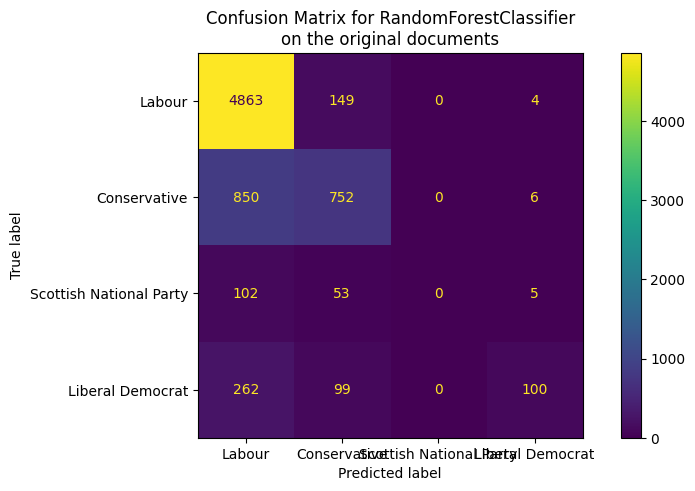

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

labels = y_test.unique()

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, random_forest_predict, ax=ax)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
_ = ax.set_title(
    f"Confusion Matrix for {random_forest.__class__.__name__}\non the original documents"
)